In [1]:
# include all usefull libs
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def convert(dataframe):
    dataframe = dataframe.to_numpy()
    dataframe = dataframe.reshape(-1)
    return dataframe[::2], dataframe[1::2]

In [3]:
# open file section
FILE_NAME = 'perf.csv'

# WARNING:  the first line in for only title of columns
# First col  -> X_Data
# Second col -> Y_Data

input_file = pd.read_csv(FILE_NAME)

# data input
X_Data, Y_Data = convert(input_file)
X_Err = 0.01
Y_Err = 0.005

/tmp/ipykernel_271155/1581622761.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ks" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(


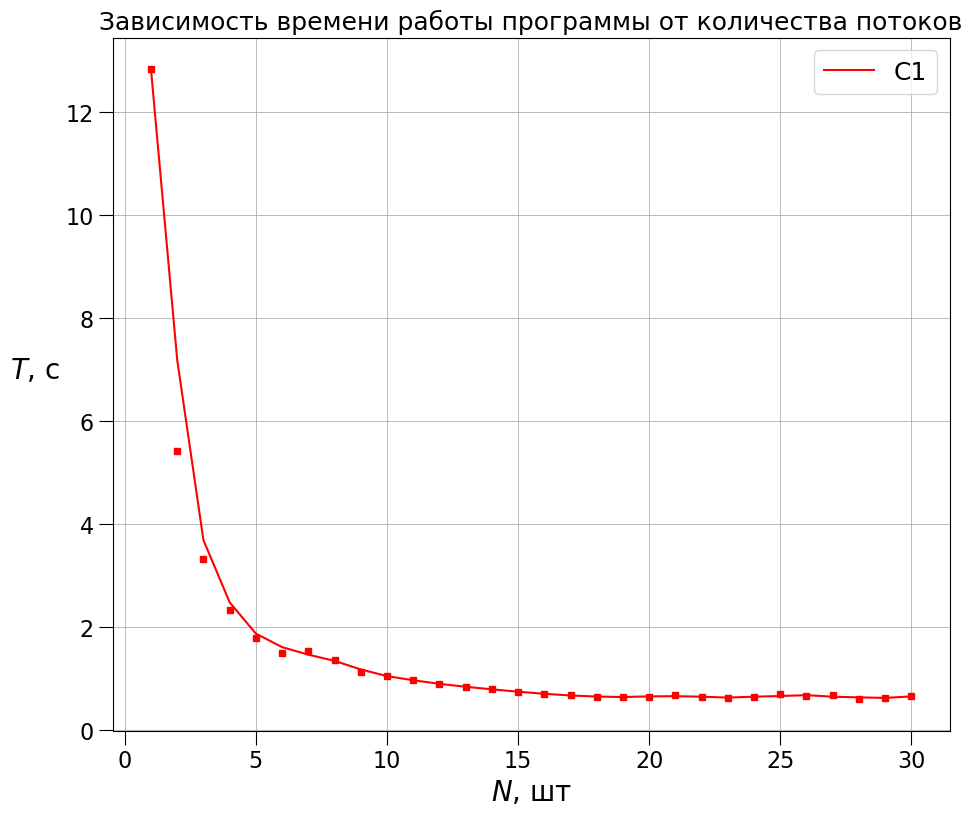

In [4]:
# Main graph constants
GRAPH_TITLE      = "Зависимость времени работы программы от количества потоков"
VERTICAL_LABEL   = "$T$, с"
GORIZONTAL_LABEL = "$N$, шт"

graph = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)

plt.title(GRAPH_TITLE, fontsize=18)
#plt.xlim(xmin=295, xmax=320)
#plt.ylim(ymin=2500, ymax=7000)
plt.ylabel(VERTICAL_LABEL, fontsize=20, rotation=0, ha='right')
plt.xlabel(GORIZONTAL_LABEL, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.errorbar(
    X_Data,
    Y_Data,
    fmt='ks',
    color='r',
    linewidth=0,
    markersize=5,
    elinewidth=1,
    xerr=X_Err,
    yerr=Y_Err,
    capsize=2
)


win = 3
filt = np.ones(win)/win
mov = win//2
res = np.convolve(Y_Data, filt, mode='same')

res[0]  = Y_Data[0]
res[-1] = Y_Data[-1]

plt.plot(X_Data, res, 'r', label="C1")


plt.legend(fontsize=18, markerscale = 1)
plt.show()

In [6]:
# save file 
OUTPUT_FILENAME  = 'perf.png'

graph.savefig(
    OUTPUT_FILENAME,
    format='png',
    bbox_inches='tight',
    #pad_inches=4
)